# Gaussian State

## Overview

A Gaussian state is an $n$-qubit quantum state defined as
$$ |\Psi \rangle := \frac{1}{\sqrt{\sum_x |f(x)|^2}} \sum_{x=0}^{N-1} f(x) |x\rangle, $$
where $N=2^n$ and $f(x) = \text{exp}(-\beta x^2 /2)$ is the Gaussian function. Gaussian states are ubiquitous in the application of quantum algorithms to quantum chemistry, quantum field theory simulation, and finance applications.

A recent preprint [1] proposed a procedure for preparing Gaussian states. It leverges the block encoding of the sine value of equally spaced sample points $\sum_x \sin(x/N)|x\rangle \langle x|$. By applying the quantum eigenvalue transformation on this block encoding, a Gaussian state is prepared. Consequently, the problem is reduced to finding the phase factors generating the following function:
$$ h(z) = f(\arcsin(z)) \propto \exp(-\beta \arcsin^2(x)/2), $$
where $z=\sin(x)$ transforms the domain to $z \in [0, \sin(1)]$.

## Setup and approximate target function

norm error = 4.2473472425764815e-10
max of solution = 0.9899999997914414


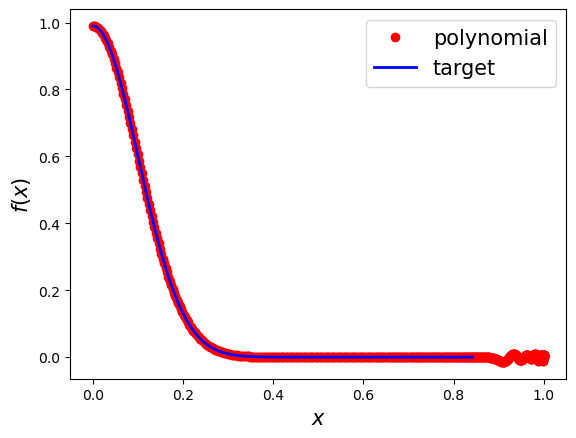

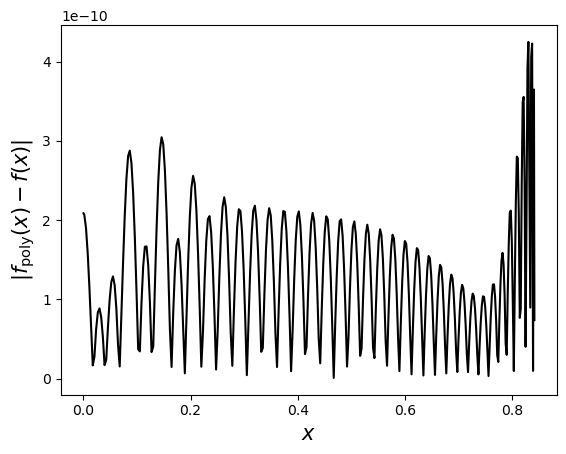

In [1]:
import numpy as np
from optimization.utils import cvx_poly_coef

beta = 100
targ = lambda x: np.exp(-beta/2 * np.arcsin(x)**2)
deg = 100
parity = deg % 2

opts = {
    'intervals': [0, np.sin(1)],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 500,
    'fscale': 0.99,
    'isplot': True,
    'method': 'cvxpy',
    'maxiter': 100,
    'criteria': 1e-12,
    'useReal': True,
    'targetPre': True,
    'print': True
}

coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]

## Solving the phase factors and verifying

iter err          
   1  +1.5414e-01
   2  +3.4730e-02
   3  +6.6586e-03
   4  +6.6105e-04
   5  +1.0191e-05
   6  +2.5796e-09
Stop criteria satisfied.
The residual error is
6.8833827526759706e-15


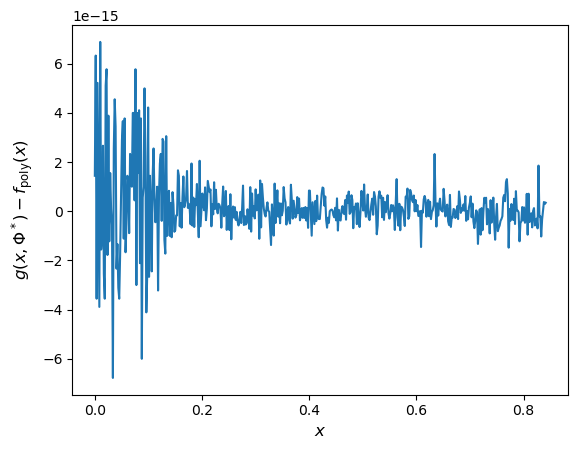

In [2]:
opts['method'] = 'Newton'

from optimization.QSP_solver import solve
phi_proc, out = solve(coef, parity, opts)

from optimization.utils import chebyshev_to_func
from optimization.core import get_entry
import matplotlib.pyplot as plt

xlist = np.linspace(0, np.sin(1), 500)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, phi_proc, out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

plt.plot(xlist, QSP_value - func_value)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$g(x,\\Phi^*)-f_\\mathrm{poly}(x)$', fontsize=12)
plt.show()

## Reference
1. McArdle, S., Gilyén, A., & Berta, M. (2022). Quantum state preparation without coherent arithmetic. *arXiv:2210.14892*.